In [15]:
# Import necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
sns.set(style="whitegrid")

In [9]:
fuel_econ = pd.read_csv('fuel_econ.csv')
fuel_econ.head() 
#fuel_econ.shape

,id,make,model,year,VClass,drive,trans,fuelType,cylinders,displ,pv2,pv4,city,UCity,highway,UHighway,comb,co2,feScore,ghgScore
0,32204,Nissan,GT-R,2013,Subcompact Cars,All-Wheel Drive,Automatic (AM6),Premium Gasoline,6,3.8,79,0,16.4596,20.2988,22.5568,30.1798,18.7389,471,4,4
1,32205,Volkswagen,CC,2013,Compact Cars,Front-Wheel Drive,Automatic (AM-S6),Premium Gasoline,4,2.0,94,0,21.8706,26.9770,31.0367,42.4936,25.2227,349,6,6
2,32206,Volkswagen,CC,2013,Compact Cars,Front-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.6,94,0,17.4935,21.2000,26.5716,35.1000,20.6716,429,5,5
3,32207,Volkswagen,CC 4motion,2013,Compact Cars,All-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.6,94,0,16.9415,20.5000,25.2190,33.5000,19.8774,446,5,5
4,32208,Chevrolet,Malibu eAssist,2013,Midsize Cars,Front-Wheel Drive,Automatic (S6),Regular Gasoline,4,2.4,0,95,24.7726,31.9796,35.5340,51.8816,28.6813,310,8,8


In [10]:
fuel_econ.columns

Index(['id', 'make', 'model', 'year', 'VClass', 'drive', 'trans', 'fuelType',
       'cylinders', 'displ', 'pv2', 'pv4', 'city', 'UCity', 'highway',
       'UHighway', 'comb', 'co2', 'feScore', 'ghgScore'],
      dtype='object')

**Task 1:** Let's look at the relationship between fuel mileage ratings for city vs. highway driving,

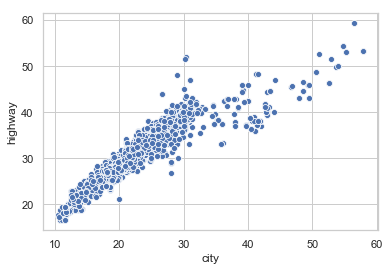

In [11]:
sns.scatterplot(data=fuel_econ,x='city',y='highway');

**Task 2:** Let's look at the relationship between fuel mileage ratings for Ucity vs. highway driving,

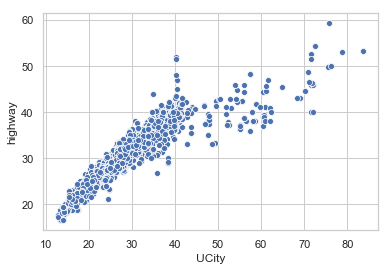

In [6]:
sns.scatterplot(data=fuel_econ,x='UCity',y='highway')

#### Advance1: Regplot (Scatterplot + Regression)

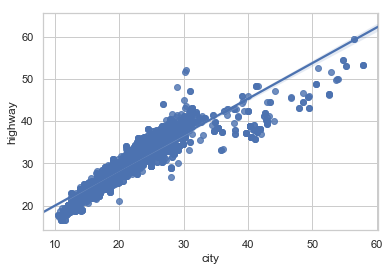

In [13]:
sns.regplot(data=fuel_econ,x='city',y='highway',fit_reg=True);
# fig_reg=True show regression line of dataset 
#plt.xlabel('Number of city')
#plt.ylabel('number of highway')

By default, the regression function is linear, and includes a shaded confidence region for the regression estimate. In this case, since the trend looks like a **logarithm relationship plotting the regression** line on the raw units is not appropriate. So we can do **case analysis**

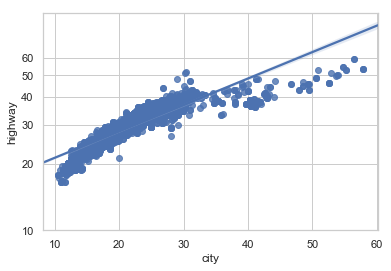

In [27]:
def log_trans(x, inverse = False):
    if not inverse:
        return np.log10(x)
    else:
        return np.power(10, x)

sns.regplot(fuel_econ['city'],fuel_econ['highway'].apply(log_trans))
tick_locs = [10, 20, 30,40,50,60 ]
plt.yticks(log_trans(tick_locs), tick_locs)
plt.show()

**Lowess(locally weighted ruboust scatterplot smoothing):** estimating a nonparametric locally wiehgted linear regression 

In [29]:
rs = np.random.RandomState(7)  
# set the random data 
x = rs.normal(2, 1, 75)
y = 2 + 1.5 * x + rs.normal(0, 2, 75)

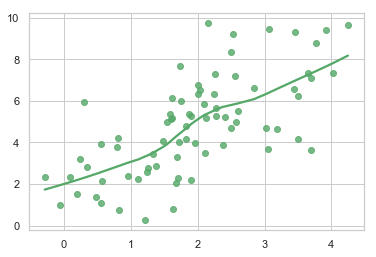

In [30]:
sns.regplot(x=x,y=y,color="g",lowess=True);

#### Advance2: Residplot (Scatterplot + Regression)

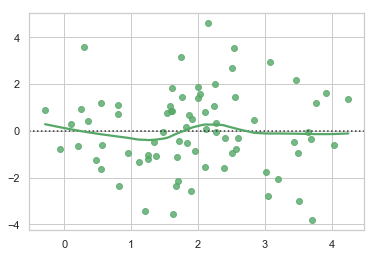

In [31]:
sns.residplot(x=x,y=y,color="g",lowess=True);

what is actually difference between "regplot" and "residplot" ??? 

- regplot shows the regression between two numerical data 
- residpolot show the correlation between  tow numerical data 

#### Overplotting, Transparency, and Jitter

If we have a very large number of points to plot or our numeric variables are discrete-valued, then it is possible that using a scatterplot straightforwardly will not be informative. The visualization will suffer from overplotting, where the high amount of overlap in points makes it difficult to see the actual relationship between the plotted variables.

Transparency can be added to a scatter call by adding **the "alpha" parameter set to a value between 0 (fully transparent, not visible) and 1 (fully opaque).**

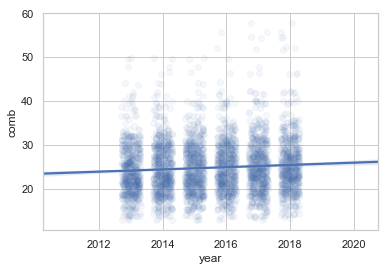

In [13]:
sns.regplot(data=fuel_econ,x='year',y='comb',x_jitter=0.3,
          scatter_kws={'alpha': 1/20});
# x_jitter=0.3 means each x value will be adjusted up to 0.3 more or 0.3 less
# scatter-kws with alpha shows transperancy. 
# Darker areas naturally come about as an outcome of transparent points overlapping 